In [1]:
import numpy as np
import sim_probCCA as sc
import canon_corr as cca
import prob_cca as pcca
import scipy.linalg as slin
import matplotlib.pyplot as plt

xDim,yDim,zDim = 30,30,5

# simulate from pCCA model
pcca_sim = sc.sim_probCCA(xDim,yDim,zDim,rand_seed=0)
X,Y = pcca_sim.sim_data(10000,rand_seed=0)
sim_model = pcca.prob_cca()
sim_model.set_params(pcca_sim.get_params())


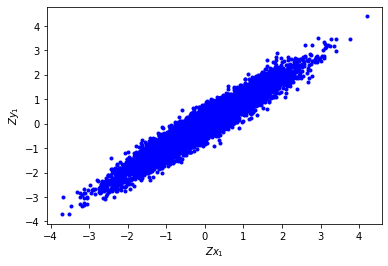

In [2]:
# vanilla CCA
cca_model = cca.canon_corr()
cca_model.train(X,Y,zDim)
Zx,Zy = cca_model.proj_data(X,Y)

plt.figure(0)
plt.plot(Zx[:,0],Zy[:,0],'b.')
plt.xlabel('$Zx_{1}$')
plt.ylabel('$Zy_{1}$')
plt.show()


In [3]:
# pCCA
pcca_model = pcca.prob_cca()
pcca_model.train(X,Y,zDim,warmstart=False,tol=1e-9,rand_seed=5)
# pcca_model.train_maxLL(X,Y,zDim)
z_pcca,curr_LL = pcca_model.estep(X,Y)
# z_orth,Worth = pcca_model.orthogonalize(z_pcca['zx_mu'],z_pcca['zy_mu'])
Z_x = z_pcca['zx_mu']
Z_y = z_pcca['zy_mu']

plt.figure(1)
plt.plot(Z_x[:,0],Z_y[:,0],'b.')
plt.xlabel('$Zx_{1}$')
plt.ylabel('$Zy_{1}$')
plt.show()


TypeError: list indices must be integers or slices, not str

In [ ]:
# crossvalidate pCCA
pcca_model = pcca.prob_cca()
LLs,zDim_list,max_LL,zDim = pcca_model.crossvalidate(X,Y)

plt.figure(2)
plt.plot(zDim_list,LLs,'bo-')
plt.plot(zDim,max_LL,'r^')
plt.show()


In [ ]:
cv_rho = pcca_model.get_params()['cv_rho']
train_rho = pcca_model.get_params()['rho']
true_rho = sim_model.get_params()['rho']

plt.figure(3)
plt.plot(train_rho,'bo-')
plt.plot(cv_rho,'ro-')
plt.plot(true_rho,'ko-')
plt.legend(('train','cv','ground truth'))
plt.show()

In [ ]:
# compute metrics
fit_metrics = pcca_model.compute_metrics()
gt_metrics = sim_model.compute_metrics()


In [ ]:
cca_model.params['W_x'][:,0]

In [ ]:
u,d,v = slin.svd(Z_x.T.dot(Z_x))

In [ ]:
pcca_model.get_params()['rho']

In [ ]:
pcca_model.params['W_x'].dot(u)[:,0]

In [ ]:
Z_x.T.dot(Z_x)

In [ ]:
u.dot(u.T)

In [ ]:
W_x, W_y = pcca_model.params['W_x'], pcca_model.params['W_y']
psi_x, psi_y = pcca_model.params['psi_x'], pcca_model.params['psi_y']

# compute canonical correlations
est_covX = W_x.dot(W_x.T) + psi_x
est_covY = W_y.dot(W_y.T) + psi_y
est_covXY = W_x.dot(W_y.T)
inv_sqrt_covX = slin.inv(slin.sqrtm(est_covX))
inv_sqrt_covY = slin.inv(slin.sqrtm(est_covY))
K = inv_sqrt_covX.dot(est_covXY).dot(inv_sqrt_covY)
u2,d,v2 = slin.svd(K,econ=True)
rho = d[0:zDim]

In [ ]:
u2[:,0:zDim]